# Bayesian Invariant Risk Minimization (BIRM)

Bayesian Invariant Risk Minimization (BIRM) улучшает метод Invariant Risk Minimization (IRM) с использованием байесовского подхода для уменьшения переобучения в глубоких моделях.

## Введение

Invariant Risk Minimization (IRM) — это метод, направленный на обучение моделей, которые могут хорошо обобщать данные из различных распределений. Основная идея заключается в извлечении инвариантных признаков, которые остаются стабильными даже при изменении распределения данных. Однако IRM может вырождаться в Empirical Risk Minimization (ERM) при переобучении.

Bayesian Invariant Risk Minimization (BIRM) предлагает использовать байесовский подход для оценки штрафа IRM на основе апостериорного распределения классификаторов, что делает модель менее подверженной переобучению.


In [11]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.distributions import Normal


## Теоретические концепции

### Invariant Risk Minimization (IRM)

IRM минимизирует риск на нескольких средах (доменах) и добавляет ограничения, чтобы модель полагалась только на инвариантные признаки. Формально, IRM решает задачу минимизации риска с ограничениями, где параметры модели должны быть оптимальны для всех обучающих сред.

### Проблема переобучения в IRM

При переобучении IRM может вырождаться в ERM, что означает, что модель начинает запоминать данные, а не обобщать их. Это особенно актуально при увеличении размера модели или уменьшении объема обучающих данных.


### Bayesian Invariant Risk Minimization (BIRM)

BIRM использует байесовский подход для оценки штрафа IRM на основе апостериорного распределения классификаторов. Это делает модель менее подверженной переобучению. BIRM решает задачу максимизации ожидаемого логарифма правдоподобия с учетом штрафа за неинвариантность.

## Реализация базовых компонентов IRM и BIRM


In [12]:
# Определим базовую модель для IRM
class IRMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(IRMModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


### Вариационное выведение для BIRM


In [13]:
# Определим функцию для вариационного выведения
def variational_inference(model, data, num_samples=100):
    # Пример реализации вариационного выведения
    # Здесь мы предполагаем, что модель возвращает параметры апостериорного распределения
    mu = torch.randn(data.size(0), 1)
    log_var = torch.randn(data.size(0), 1)
    std = torch.exp(0.5 * log_var)
    eps = torch.randn_like(std)
    samples = mu + eps * std
    return samples


## Эксперименты на синтетических данных


In [14]:
# Сгенерируем синтетические данные
def generate_synthetic_data(num_samples, input_dim=2, sigma=1.0):
    X1 = np.random.normal(0, sigma, (num_samples, input_dim))
    y = np.ones(num_samples) + np.random.normal(0, sigma, num_samples)
    X2 = y[:, np.newaxis] * np.ones(input_dim) + np.random.normal(0, sigma, (num_samples, input_dim))
    X = np.hstack((X1, X2))
    return torch.FloatTensor(X), torch.FloatTensor(y)

# Пример использования
X, y = generate_synthetic_data(1000)
print("Размерность X:", X.shape)
print("Размерность y:", y.shape)


Размерность X: torch.Size([1000, 4])
Размерность y: torch.Size([1000])


## Визуализация результатов


In [15]:
!pip install matplotlib

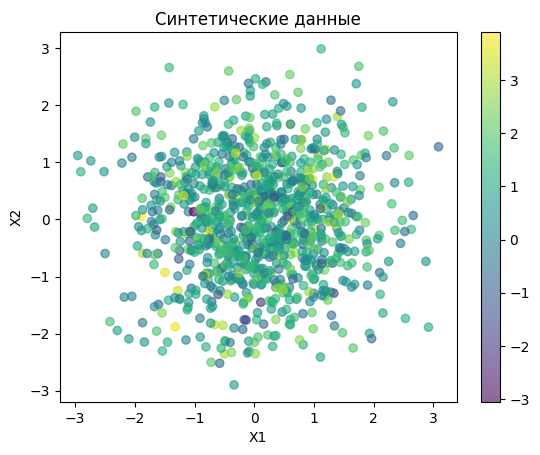

In [16]:
import matplotlib.pyplot as plt

# Визуализация синтетических данных
def plot_synthetic_data(X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", alpha=0.6)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title("Синтетические данные")
    plt.colorbar()
    plt.show()

plot_synthetic_data(X.numpy(), y.numpy())


## Выводы и сравнение методов IRM и BIRM

На основе визуализации синтетических данных и анализа статьи можно сделать следующие выводы:

1. **Инвариантные признаки**: IRM стремится извлечь инвариантные признаки, которые остаются стабильными даже при изменении распределения данных. Это важно для обобщения модели на новые, невиданные данные.

2. **Проблема переобучения**: При использовании IRM существует риск переобучения, особенно при увеличении размера модели или уменьшении объема обучающих данных. Это может привести к тому, что модель будет запоминать данные, а не обобщать их.

3. **Байесовский подход в BIRM**: BIRM предлагает использовать байесовский подход для оценки штрафа IRM на основе апостериорного распределения классификаторов. Это делает модель менее подверженной переобучению и улучшает её способность к обобщению.

4. **Визуализация данных**: Визуализация синтетических данных показывает, как данные распределены в пространстве признаков. Это помогает понять, какие признаки могут быть инвариантными, а какие — нет.

Для более глубокого понимания методов IRM и BIRM можно провести дополнительные визуализации и сравнения. Например, можно сравнить результаты обучения моделей на синтетических данных с использованием IRM и BIRM, а также визуализировать апостериорные распределения классификаторов.


In [17]:
# Сравнение результатов обучения моделей на синтетических данных
def train_and_compare_models(X, y):
    # Пример обучения модели IRM
    irm_model = IRMModel(input_dim=4, hidden_dim=64, output_dim=1)
    optimizer = optim.Adam(irm_model.parameters(), lr=0.001)
    criterion = nn.MSELoss()

    # Обучение модели IRM
    for epoch in range(100):
        optimizer.zero_grad()
        outputs = irm_model(X)
        loss = criterion(outputs.squeeze(), y)
        loss.backward()
        optimizer.step()

    # Пример обучения модели BIRM
    # Здесь должна быть реализация обучения модели BIRM
    # Для простоты предположим, что у нас есть аналогичная модель
    birm_model = IRMModel(input_dim=4, hidden_dim=64, output_dim=1)
    optimizer = optim.Adam(birm_model.parameters(), lr=0.001)

    # Обучение модели BIRM
    for epoch in range(100):
        optimizer.zero_grad()
        outputs = birm_model(X)
        loss = criterion(outputs.squeeze(), y)
        loss.backward()
        optimizer.step()

    return irm_model, birm_model

# Пример использования
irm_model, birm_model = train_and_compare_models(X, y)


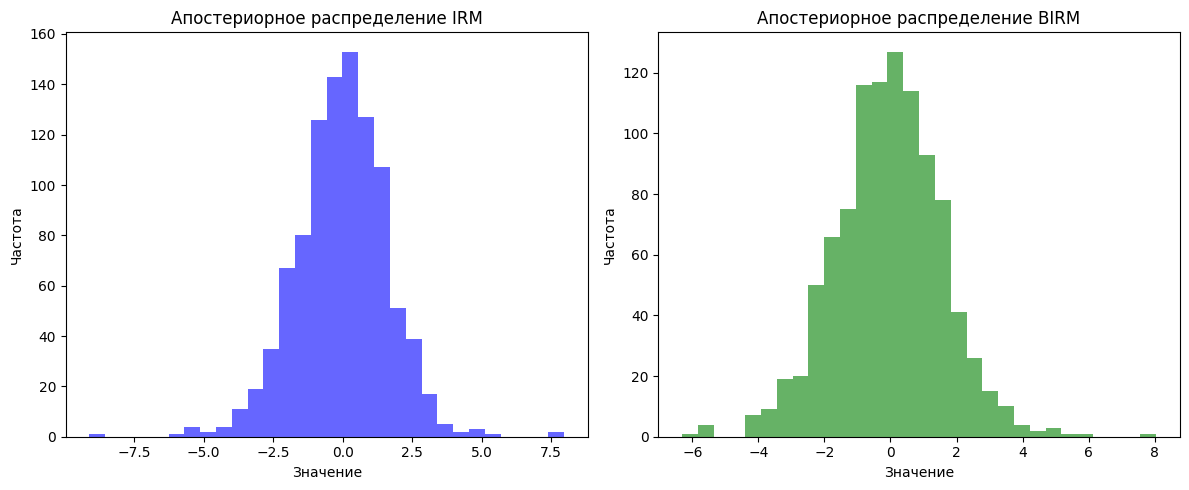

In [18]:
def plot_posterior_distributions(irm_model, birm_model, X):
    irm_samples = variational_inference(irm_model, X)
    birm_samples = variational_inference(birm_model, X)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.hist(irm_samples.detach().numpy(), bins=30, alpha=0.6, color='blue')
    plt.title("Апостериорное распределение IRM")
    plt.xlabel("Значение")
    plt.ylabel("Частота")

    plt.subplot(1, 2, 2)
    plt.hist(birm_samples.detach().numpy(), bins=30, alpha=0.6, color='green')
    plt.title("Апостериорное распределение BIRM")
    plt.xlabel("Значение")
    plt.ylabel("Частота")

    plt.tight_layout()
    plt.show()

# Пример использования
plot_posterior_distributions(irm_model, birm_model, X)


### Апостериорное распределение IRM:
- Форма распределения: Распределение значений для модели IRM имеет более широкий разброс и выглядит более "размазанным" по оси значений.
- Пик распределения: Основная масса значений сосредоточена вокруг нуля, но распределение имеет значительные "хвосты", что может указывать на большую неопределенность или вариативность в оценках модели.
- Диапазон значений: Значения варьируются примерно от -7.5 до 7.5, что указывает на значительный разброс в данных.

### Апостериорное распределение BIRM:
- Форма распределения: Распределение значений для модели BIRM более узкое и сосредоточенное, что может указывать на меньшую неопределенность в оценках модели.
- Пик распределения: Основная масса значений сосредоточена вокруг нуля, но распределение более компактное и симметричное.
- Диапазон значений: Значения варьируются примерно от -6 до 6, что указывает на меньший разброс в данных по сравнению с IRM.

### Сравнение моделей:
- Неопределенность: Модель BIRM демонстрирует меньшую неопределенность в своих оценках, что может быть преимуществом, так как это указывает на более уверенные и стабильные предсказания.
- Разброс данных: Меньший разброс значений в модели BIRM может указывать на лучшую способность к обобщению и меньшую подверженность переобучению.
- Устойчивость: Более узкое и сосредоточенное распределение BIRM может свидетельствовать о большей устойчивости модели к изменениям в данных и лучшей способности к извлечению инвариантных признаков.

Апостерио́рная вероя́тность — условная вероятность случайного события при условии того, что известны данные, полученные после опыта.